In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from modAL.models import ActiveLearner

In [2]:
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

In [3]:
iris = load_iris()
X_raw = iris['data']
y_raw = iris['target']

In [4]:
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_iris=pca.fit_transform(X=X_raw)

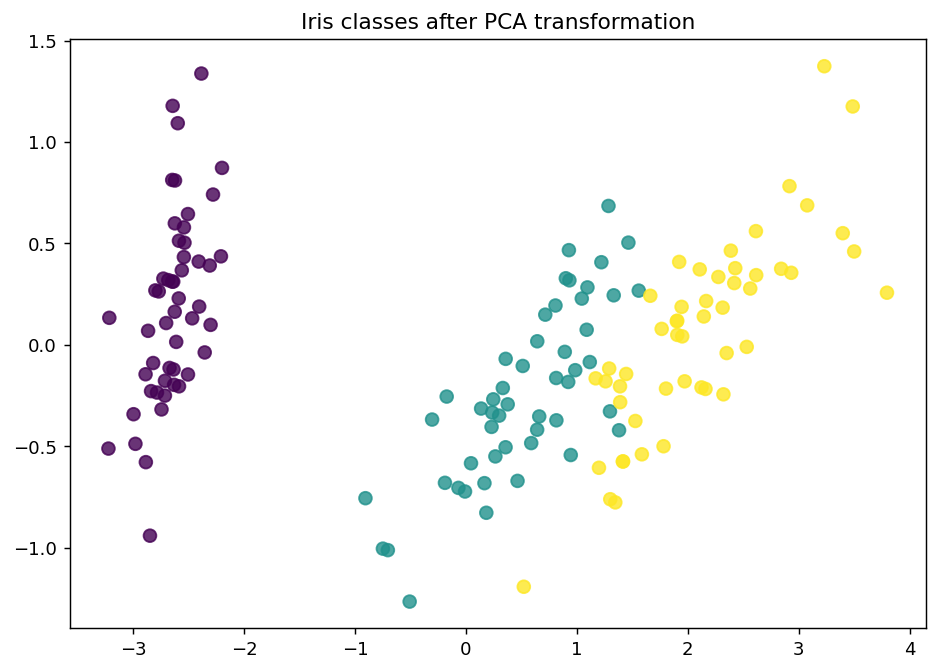

In [5]:
x_component, y_component = transformed_iris[:,0], transformed_iris[:,1]

plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=.8)
plt.title('Iris classes after PCA transformation')
plt.show()

In [6]:
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples+1, size=3)
X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)


In [10]:
clf = SVC(C=1, kernel='linear', probability=True)
learner = ActiveLearner(estimator=clf, X_training=X_train, y_training=y_train)
predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1 2 1 1 1 2 2 1 2 1 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


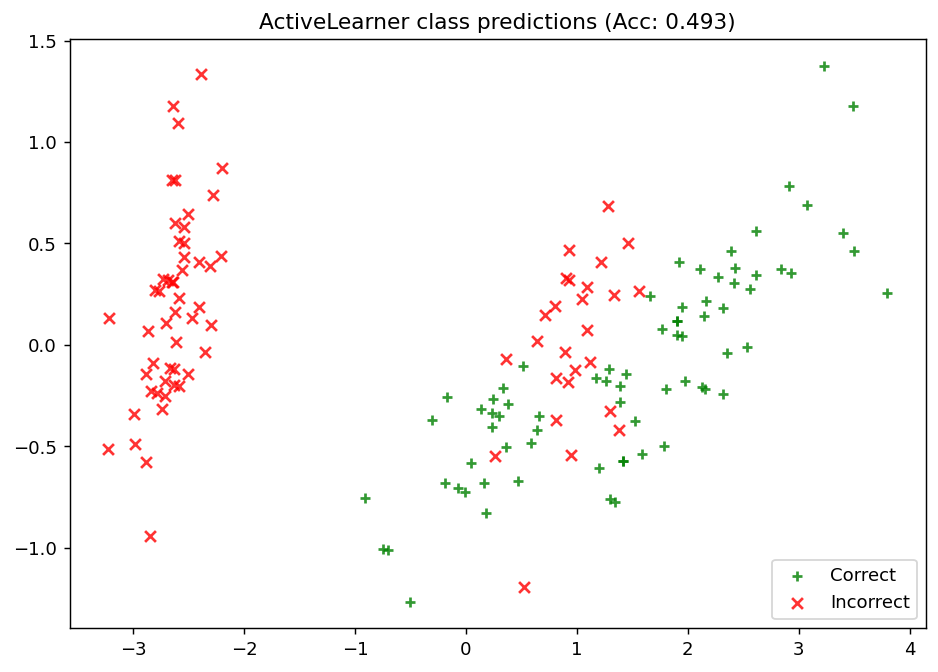

In [11]:
unqueried_score = learner.score(X_raw, y_raw)

fix, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct], y=y_component[is_correct], c='g', marker='+', label='Correct', alpha=.8)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=.8)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Acc: {score:.3f})".format(score=unqueried_score))
plt.show()

In [12]:
N_QUERIES = 20
performance_history = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)
    
    X,y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1,)
    learner.teach(X=X, y=y)
    
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    model_accuracy = learner.score(X_raw, y_raw)
    print("Acc after query {n}: {acc:0.4f}".format(n=index+1, acc=model_accuracy))
    
    performance_history.append(model_accuracy)

Acc after query 1: 0.4933
Acc after query 2: 0.4933
Acc after query 3: 0.8267
Acc after query 4: 0.8267
Acc after query 5: 0.8800
Acc after query 6: 0.8800
Acc after query 7: 0.8800
Acc after query 8: 0.8933
Acc after query 9: 0.9867
Acc after query 10: 0.9467
Acc after query 11: 0.9600
Acc after query 12: 0.9733
Acc after query 13: 0.9733
Acc after query 14: 0.9800
Acc after query 15: 0.9533
Acc after query 16: 0.9800
Acc after query 17: 0.9800
Acc after query 18: 0.9800
Acc after query 19: 0.9600
Acc after query 20: 0.9800


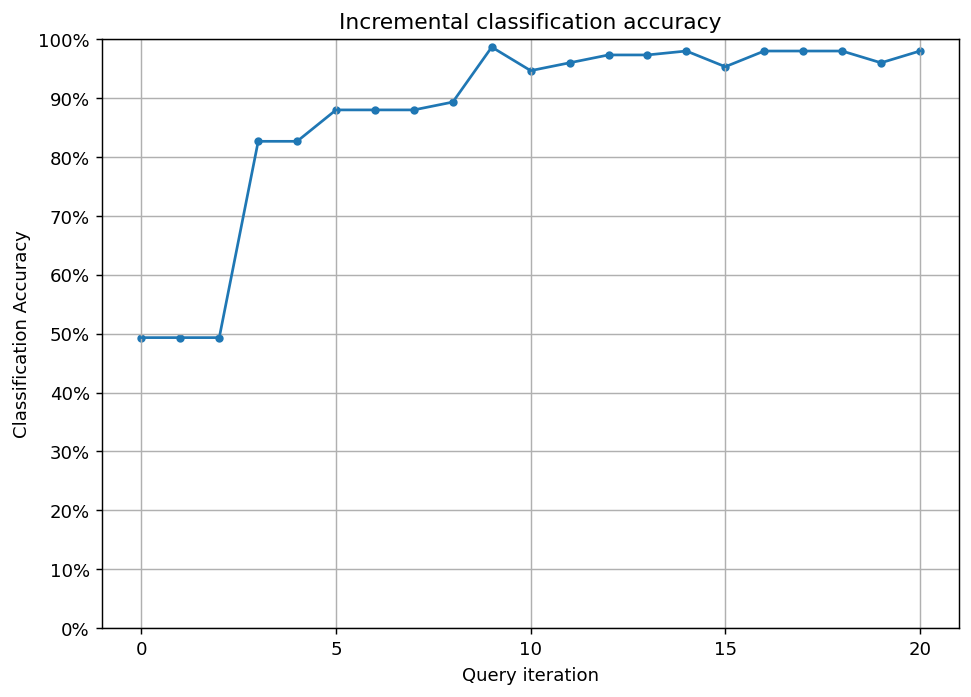

In [13]:
fig, ax = plt.subplots(figsize=(8.5,6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)


ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

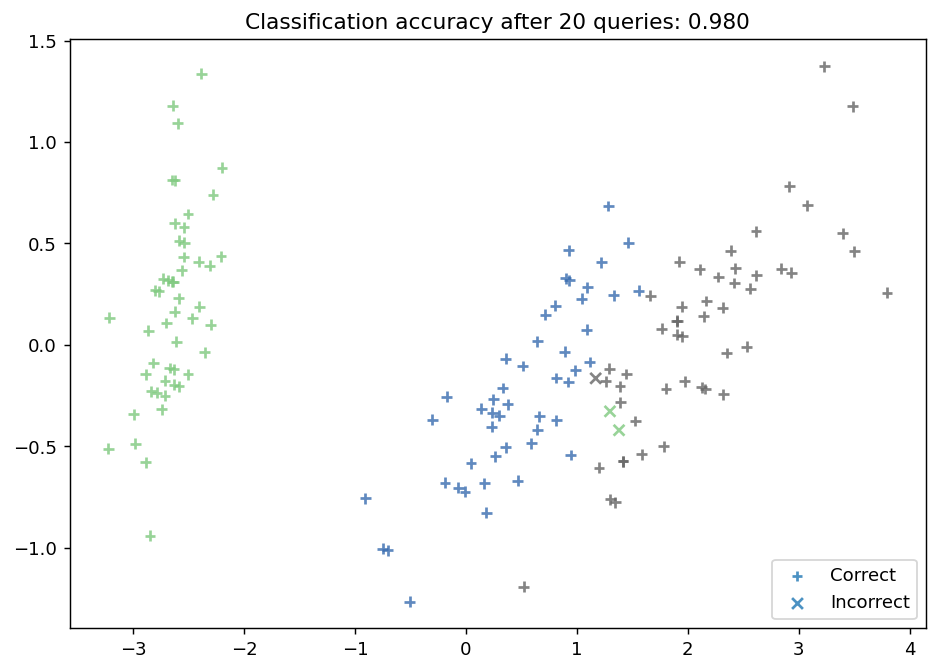

In [14]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c=y_raw[is_correct], cmap='Accent', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c=y_raw[~is_correct], cmap='Accent', marker='x', label='Incorrect', alpha=8/10)

ax.set_title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=N_QUERIES, final_acc=performance_history[-1]))
ax.legend(loc='lower right')

plt.show()

